# Loading data into matrices
### We took our encoded data from other notebook and instantiated it in this notebook

In [417]:
%store -r X
print(X)

[[18.5 19.7 22.4 ... 18.9 18.6  1. ]
 [23.7 36.3  2.2 ... 26.5 34.1  1. ]
 [18.4 27.5  0.  ... 19.7 24.4  0. ]
 ...
 [10.  20.1  0.  ... 14.3 19.   0. ]
 [ 9.9 25.3  0.  ... 14.4 24.5  0. ]
 [14.4 19.8 13.2 ... 15.4 16.6  1. ]]


In [418]:
%store -r Y
print(Y)

[1 1 1 ... 0 0 0]


In [419]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

# Default Decision Tree Classifiers
## Default Random Splits

We are repeating the random splits 15 times

In [420]:
for i in range(0, 15):

    #Splitting dataset matrices into training 80% and testing 20%
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

    #declare default DT classifier
    default_model = tree.DecisionTreeClassifier()

    #Training it   
    default_model.fit(X_train, y_train)

    print('(Training, Testing) Accuracy Result : ', default_model.score(X_train, y_train), ', ', default_model.score(X_test, y_test))

(Training, Testing) Accuracy Result :  1.0 ,  0.821256038647343
(Training, Testing) Accuracy Result :  1.0 ,  0.7874396135265701
(Training, Testing) Accuracy Result :  1.0 ,  0.7729468599033816
(Training, Testing) Accuracy Result :  1.0 ,  0.7922705314009661
(Training, Testing) Accuracy Result :  1.0 ,  0.7971014492753623
(Training, Testing) Accuracy Result :  1.0 ,  0.8164251207729468
(Training, Testing) Accuracy Result :  1.0 ,  0.7971014492753623
(Training, Testing) Accuracy Result :  1.0 ,  0.8067632850241546
(Training, Testing) Accuracy Result :  1.0 ,  0.748792270531401
(Training, Testing) Accuracy Result :  1.0 ,  0.7971014492753623
(Training, Testing) Accuracy Result :  1.0 ,  0.7874396135265701
(Training, Testing) Accuracy Result :  1.0 ,  0.8260869565217391
(Training, Testing) Accuracy Result :  1.0 ,  0.8115942028985508
(Training, Testing) Accuracy Result :  1.0 ,  0.7922705314009661
(Training, Testing) Accuracy Result :  1.0 ,  0.8260869565217391


## Default K-fold cross validation

In [421]:
cv_result = cross_validate(default_model, X, Y, cv=5)

print('Fit_time / Train_time: ', cv_result['fit_time'])
print('Score_time / Test_time: ', cv_result['score_time'])
print('Test_score / Test_accuracy: ', cv_result['test_score'])

Fit_time / Train_time:  [0.01097059 0.0099318  0.01295972 0.00897026 0.00808191]
Score_time / Test_time:  [0.00100517 0.00399089 0.00100684 0.         0.0010066 ]
Test_score / Test_accuracy:  [0.69565217 0.76811594 0.72463768 0.76213592 0.81067961]


## Plotting Decision Tree
### This is an unpruned decision tree

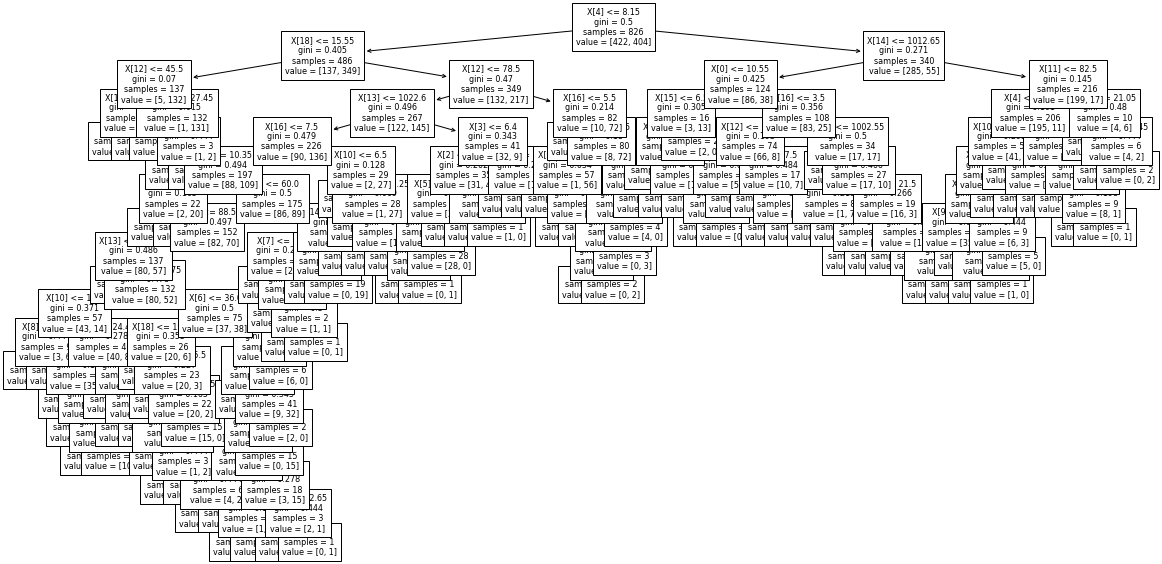

In [422]:
plt.figure(figsize=(20,10))
tree.plot_tree(default_model, fontsize=8)
plt.show()

The tree above is unpruned, because we have not adjusted any hyper parameters. As we can see the tree is Overfitted and very noisy and can't be easily undertsood. To optimize the tree we will try pruning it in the next section.

# Adjusting Hyper parameters
The default parameters that control the size of the trees will lead to fully grown and unpruned trees that results in an Overfitted or Underfitted model. To reduce that we will control the parameter values so the tree may fit the training data well. In our case we will be controlling the min_samples_split and max_depth.

## Finding the best Min_sample_split
We will find the best min_Samples_split value by training our DT fo min_Samples_split within the range of 10 - 40 and find the best value using balanced f-score metric.


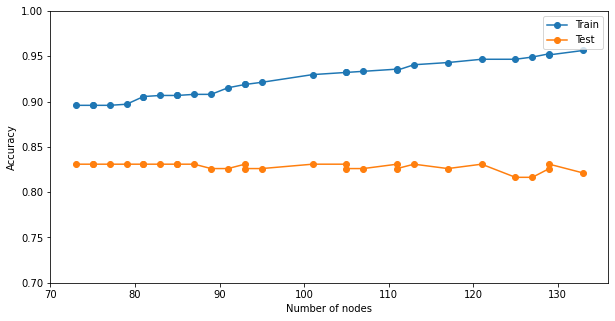

In [423]:
# define lists to collect score
train_scores, test_scores, f1_scores, total_nodes = list(), list(), list(), list()

#defining min_sample_split values (number of nodes)
values = [i for i in range(10, 40)]
    
# evaluate a decision tree for each min_sample_split
for i in values:
    #creating the calssifier and adjusting the min_samples_split
    model = tree.DecisionTreeClassifier(min_samples_split=i)

    #Training it
    model.fit(X_train, y_train)

    #count total number of nodes and append to list
    total_nodes.append(model.tree_.node_count)

    #appending training accuracy
    train_scores.append(model.score(X_train, y_train))
    
    #appending testing accuracy
    test_scores.append(model.score(X_test, y_test))

    #Making predictions
    y_pred = model.predict(X_test)
    #appending the f1_score
    f1_scores.append(f1_score(y_test, y_pred,))
    

# plot of accuracy vs 'numbed of nodes'
plt.figure(figsize=(10,5))

plt.plot(total_nodes, train_scores, '-o', label='Train')
plt.plot(total_nodes, test_scores, '-o', label='Test')

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")

plt.axis([None, None, 0.7, 1.0])
plt.legend()
plt.show()


In the graph above we have plotted the Training and Testing Accuracy against the Number of nodes and we can see that Training accuracy is higher than testing accuracy which is expected. The training accuracy fluctuates between 90% - 95% and testing accuracy fluctuates between 80% - 85% 

In the case of this specific graph as shown above, the smallest gap lies around the 25 number of nodes mark.

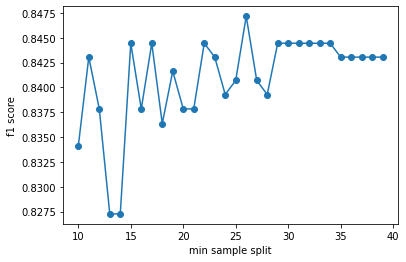

In [424]:
#plotting f1 score graph
plt.xlabel("min sample split")
plt.ylabel("f1 score")
plt.plot(values, f1_scores,'-o')
plt.show()

We have additionally plotted the f1_score against the min_sample_split and we need the best f1_score to go ahead with

#### Based on the f1_score metric we will calculate the best min_samples_split to continue of with

In [425]:
print("Best min_sample_split value:")
max_f1_score = max(f1_scores)
index = f1_scores.index(max_f1_score)
best_min_sample_split = values[index]
print('min_Samples_split : ', best_min_sample_split)
print('f1_score : ', max_f1_score)
print('train_accuracy : ', train_scores[index])
print('testing_accuracy : ', test_scores[index])


Best min_sample_split value:
min_Samples_split :  26
f1_score :  0.8471615720524018
train_accuracy :  0.9188861985472155
testing_accuracy :  0.8309178743961353


## Finding the best Max_depth
We will find the best max_depth value by training our DT fo min_Samples_split = xx and max-depth values within the range of 1 - 10 and find the best values using balanced f-score metric.

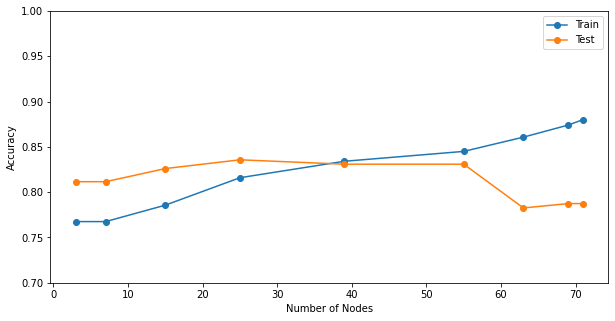

In [426]:
# define lists to collect score
train_scores, test_scores, f1_scores, total_nodes = list(), list(), list(), list()

#defining max_depth values
max_depth_values = [i for i in range(1, 10)]
    
# evaluate a decision tree for each max_depth
for i in max_depth_values:
    #creating the calssifier and adjusting the max_depth
    adjusted_model = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=i)

    #Training it
    adjusted_model.fit(X_train, y_train)

    #count total number of nodes and append to list
    total_nodes.append(adjusted_model.tree_.node_count)

    #appending training accuracy
    train_scores.append(adjusted_model.score(X_train, y_train))
    
    #appending testing accuracy
    test_scores.append(adjusted_model.score(X_test, y_test))

    #Making predictions
    y_pred = adjusted_model.predict(X_test)
    #appending the f1_score
    f1_scores.append(f1_score(y_test, y_pred,))
    

# plot of accuracy vs 'numbed of nodes'
plt.figure(figsize=(10,5))

plt.plot(total_nodes, train_scores, '-o', label='Train')
plt.plot(total_nodes, test_scores, '-o', label='Test')

plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")

plt.axis([None, None, 0.7, 1.0])
plt.legend()
plt.show()

In the graph above we have plotted the Training and Testing Accuracy against the number of nodes and we can see that Training and testing accuracy becomes more pure as depth increases but this means that the difference in testing and training accuracy also increases.

In the case of this specific graph as shown above, the smallest gap lies around the 10 nodes but that doesn't mean that is the best since the accuracy is so low we will refer to the f1 score to make a decision.

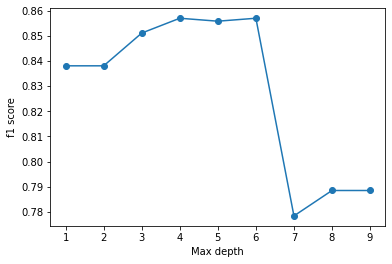

In [427]:
#plotting f1 score graph
plt.xlabel("Max depth")
plt.ylabel("f1 score")
plt.plot(max_depth_values, f1_scores,'-o')
plt.show()

We have additionally plotted the f1_score against the max_depth and find that max_depth = 4,5,6 has the highest f1_score

#### Based on the f1_score metric we will calculate the best max_depth to continue of with

In [428]:
print("Best max_depth value:")
max_f1_score = max(f1_scores)
index = f1_scores.index(max_f1_score)
best_max_depth = max_depth_values[index]
print('max_dept : ', best_max_depth)
print('f1_score : ', max_f1_score)
print('train_accuracy : ', train_scores[index])
print('testing_accuracy : ', test_scores[index])

Best max_depth value:
max_dept :  6
f1_score :  0.8571428571428572
train_accuracy :  0.8450363196125908
testing_accuracy :  0.8309178743961353


# Adjusted Decision Tree Classifier
## Adjusted Random Splits 

In [437]:
for i in range(0, 15):

    #Splitting dataset matrices into training 80% and testing 20%
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

    #declare default DT classifier
    adjusted_model = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=best_max_depth)

    #Training it   
    adjusted_model.fit(X_train, y_train)

    print('(Training, Testing) Accuracy Result : ', adjusted_model.score(X_train, y_train), ', ', adjusted_model.score(X_test, y_test))

(Training, Testing) Accuracy Result :  0.8801452784503632 ,  0.8260869565217391
(Training, Testing) Accuracy Result :  0.8753026634382567 ,  0.7729468599033816
(Training, Testing) Accuracy Result :  0.8837772397094431 ,  0.8067632850241546
(Training, Testing) Accuracy Result :  0.8716707021791767 ,  0.7922705314009661
(Training, Testing) Accuracy Result :  0.8813559322033898 ,  0.8115942028985508
(Training, Testing) Accuracy Result :  0.8813559322033898 ,  0.7681159420289855
(Training, Testing) Accuracy Result :  0.8680387409200968 ,  0.8309178743961353
(Training, Testing) Accuracy Result :  0.8886198547215496 ,  0.821256038647343
(Training, Testing) Accuracy Result :  0.8704600484261501 ,  0.7874396135265701
(Training, Testing) Accuracy Result :  0.8583535108958837 ,  0.8019323671497585
(Training, Testing) Accuracy Result :  0.8668280871670703 ,  0.7342995169082126
(Training, Testing) Accuracy Result :  0.8401937046004843 ,  0.7632850241545893
(Training, Testing) Accuracy Result :  0.

## Adjusted K-fold 

In [438]:
cv_result = cross_validate(adjusted_model, X, Y, cv=5)

print('Fit_time / Train_time: ', cv_result['fit_time'])
print('Score_time / Test_time: ', cv_result['score_time'])
print('Test_score / Test_accuracy: ', cv_result['test_score'])

Fit_time / Train_time:  [0.00902271 0.00598574 0.00698471 0.00597763 0.00598335]
Score_time / Test_time:  [0.         0.         0.00099969 0.00099802 0.        ]
Test_score / Test_accuracy:  [0.71980676 0.69082126 0.73913043 0.76699029 0.82524272]


# Plotting best fitted tree 

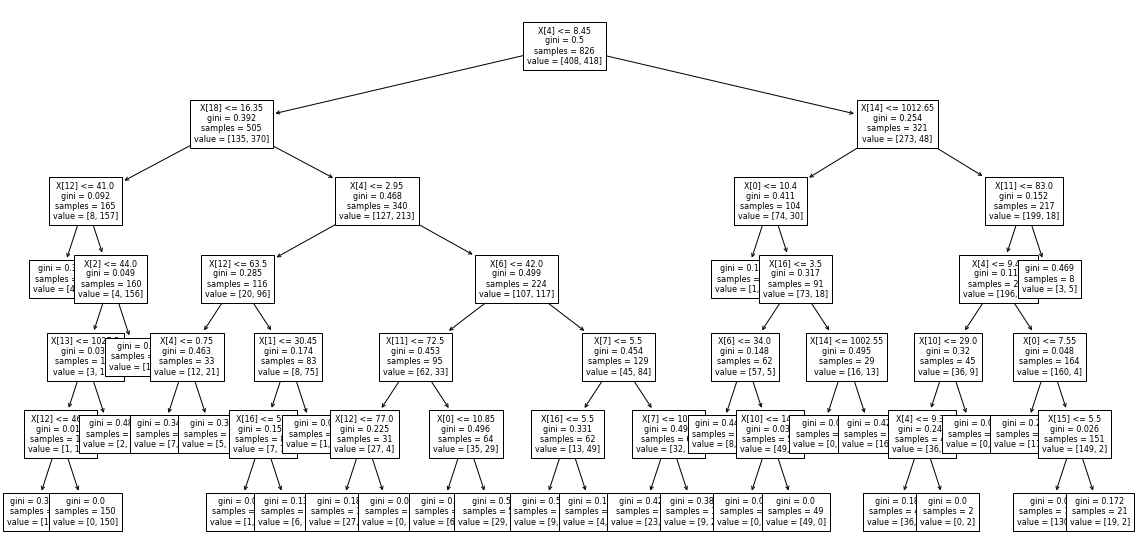

In [439]:
#using the current runs best values
# min_samples_split = 26, max_depth=6
clf = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=best_max_depth)

#Training it
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, fontsize=8)
plt.show()

From the above plotted best fitted tree we can see that each internal node has a decision rule thats splits the data. The gini refers to the Gini ratio which measures the impurity of the node. The tree above is the pruned model which is less complex than the original tree model. The gini ratio decreases as we go down tree meaning that the impurity reduces as we go down.